In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the CSV file into a DataFrame
df_cars = pd.read_csv('../data/cars.csv')

In [35]:
df_cars.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model',
 'origin',
 'car_name']

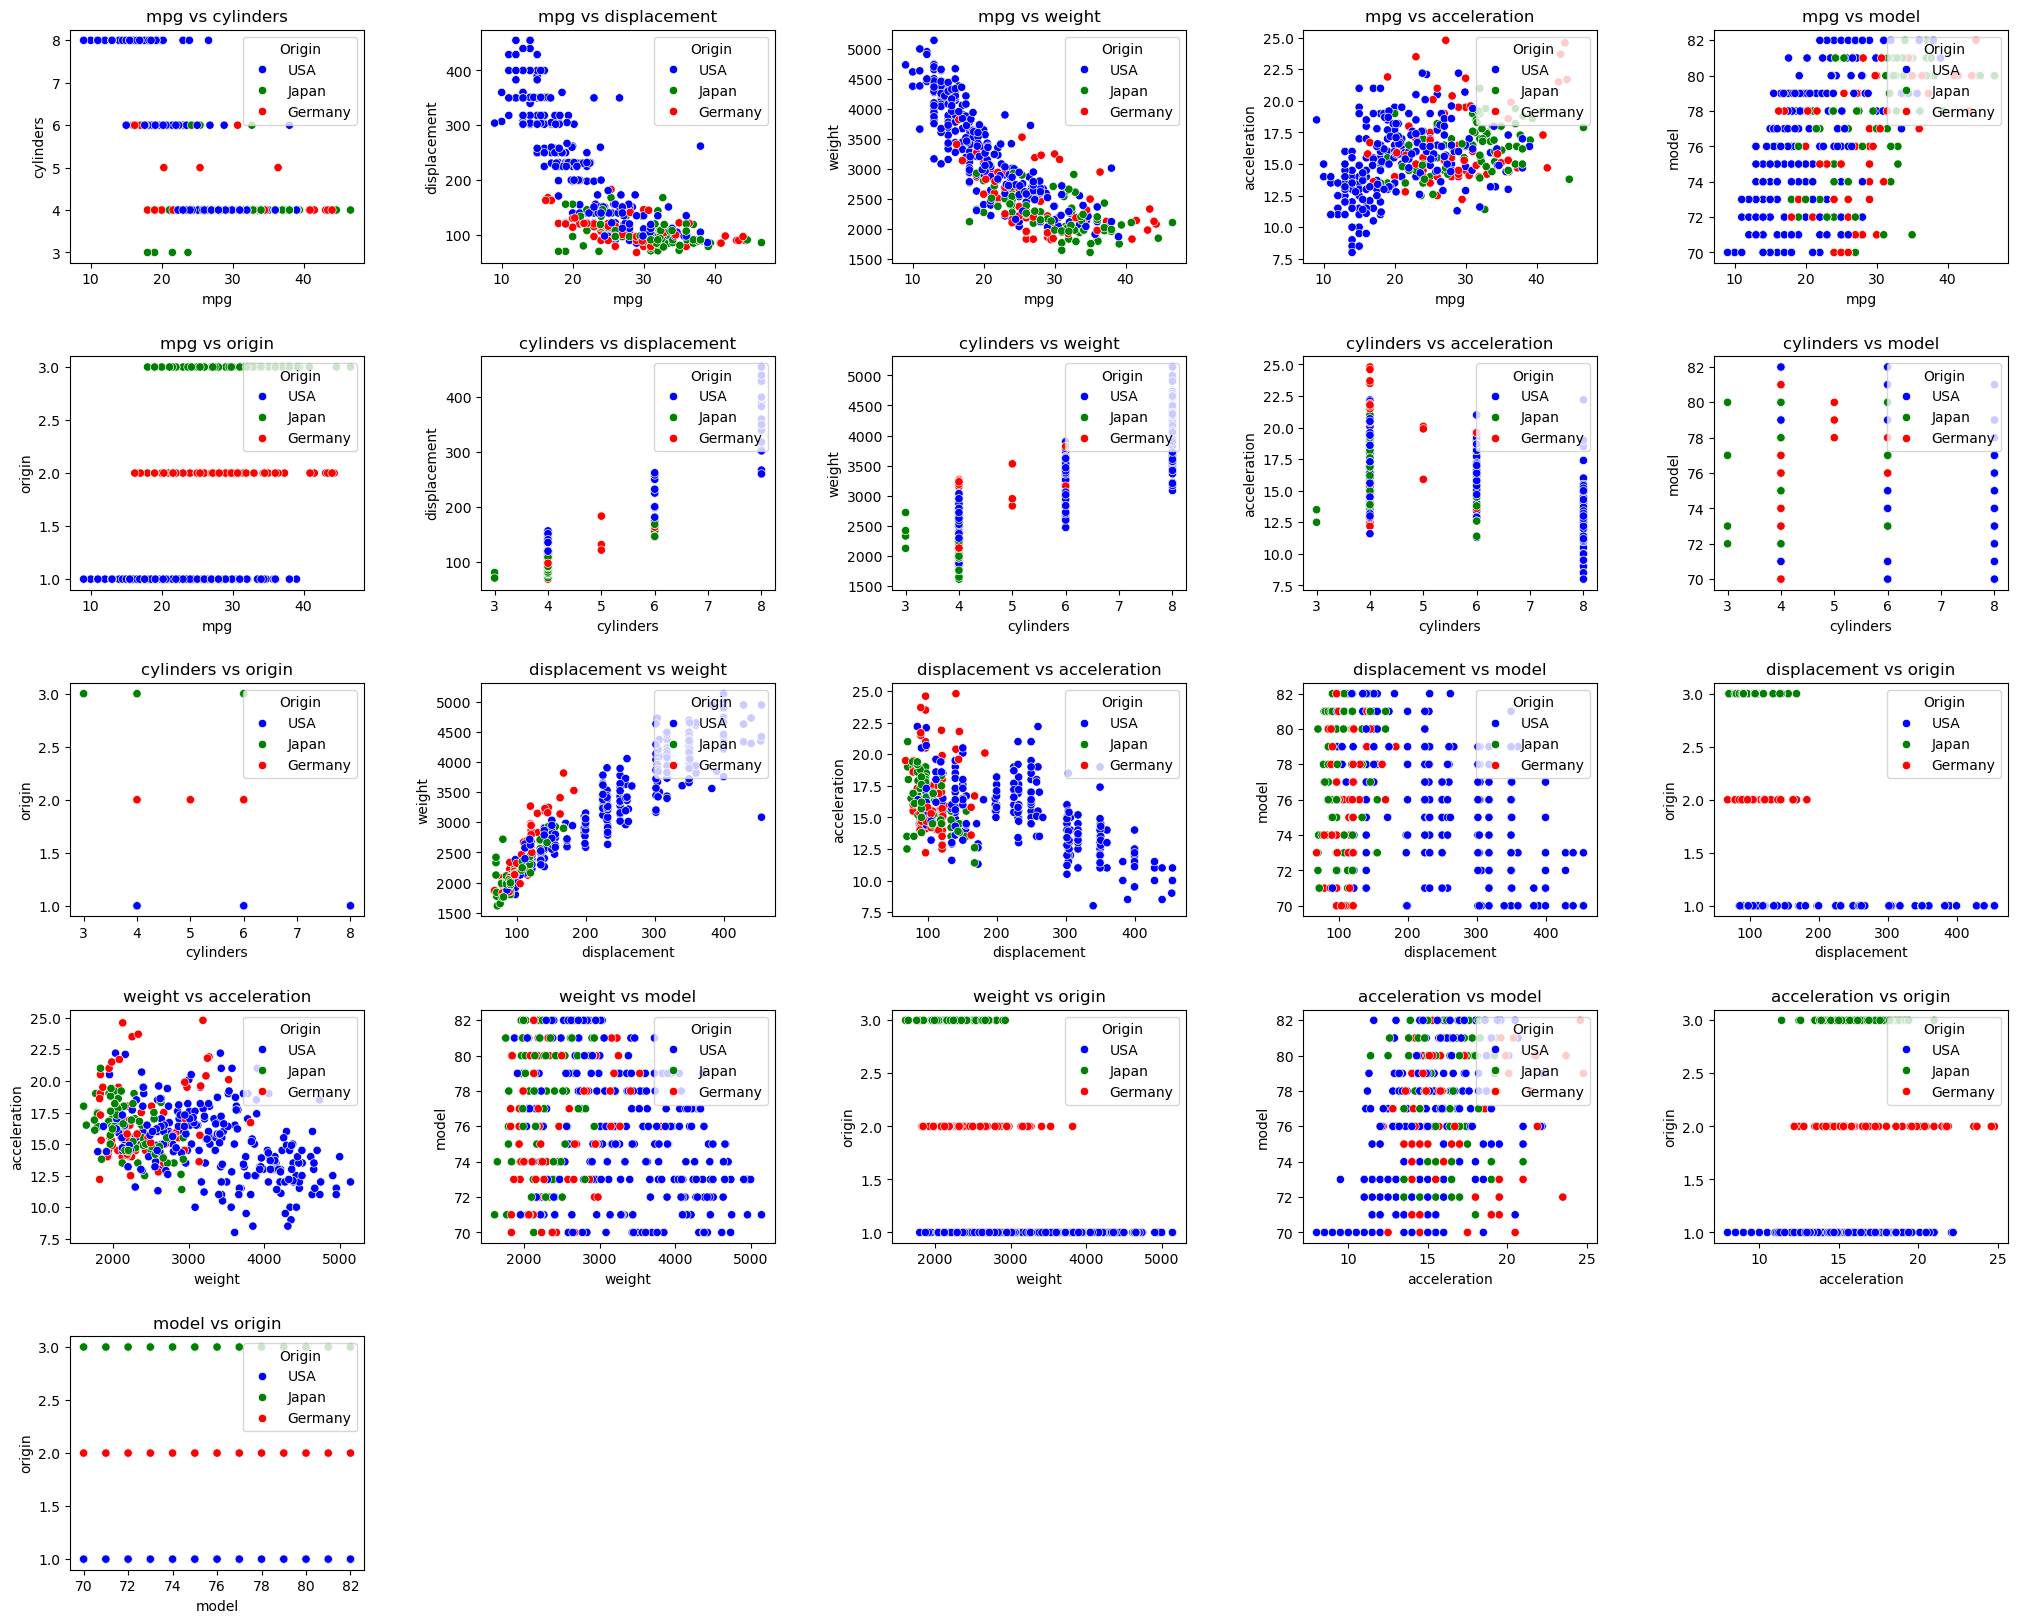

In [36]:
# Define a color map for the origins
color_map = {'USA': 'blue', 'Germany': 'red', 'Japan': 'green'}

# Ensure the 'origin_name' column exists and is correct before plotting
if 'origin_name' not in df_cars.columns or df_cars['origin_name'].isnull().any():
    origin_names = {1: 'USA', 2: 'Germany', 3: 'Japan'}
    df_cars['origin_name'] = df_cars['origin'].map(origin_names)

# Your existing plotting code follows
numerical_cols = df_cars.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_plots = len(numerical_cols) * (len(numerical_cols) - 1) // 2
grid_size = int(np.ceil(np.sqrt(num_plots)))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 5, grid_size * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes_flat = axes.flatten()
plot_idx = 0

for i, col1 in enumerate(numerical_cols):
    for col2 in numerical_cols[i+1:]:
        ax = axes_flat[plot_idx]
        sns.scatterplot(data=df_cars, x=col1, y=col2, hue='origin_name', palette=color_map, ax=ax)
        ax.set_title(f'{col1} vs {col2}')
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.legend(title='Origin', loc='upper right')
        plot_idx += 1

for idx in range(plot_idx, len(axes_flat)):
    axes_flat[idx].set_visible(False)

plt.show()

In [37]:
df_cars.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model             int64
origin            int64
car_name         object
origin_name      object
dtype: object

# Part 1
- **Question:** How do vehicles from different origins (USA, Germany, Japan) compare in terms of mpg, weight, and horsepower?

  - **Null Hypothesis $(H0)$:** There is no significant difference in mpg, weight, and horsepower among vehicles from different origins.
  - **Alternate Hypothesis $(H1)$:** There are significant differences in mpg, weight, and horsepower among vehicles from different origins.

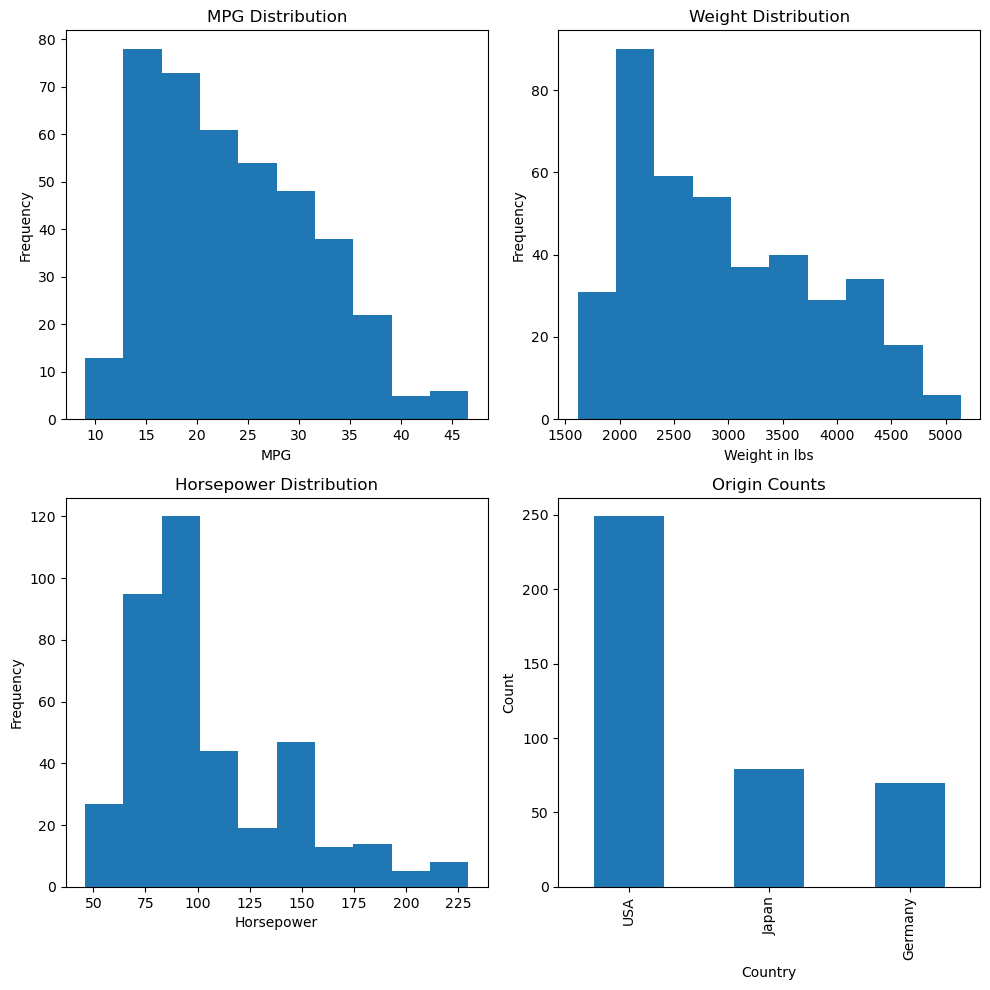

ANOVA for mpg: F_onewayResult(statistic=98.54179491075871, pvalue=1.9154864184128e-35)
ANOVA for weight: F_onewayResult(statistic=112.74350468918183, pvalue=1.8332404300161686e-39)
ANOVA for horsepower: F_onewayResult(statistic=61.342092972838266, pvalue=6.987300889212185e-24)


In [38]:
# Ensure 'mpg', 'weight', and 'horsepower' are numeric
df_cars['mpg'] = pd.to_numeric(df_cars['mpg'], errors='coerce')
df_cars['weight'] = pd.to_numeric(df_cars['weight'], errors='coerce')
df_cars['horsepower'] = pd.to_numeric(df_cars['horsepower'], errors='coerce')

# Create subplots for the histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
df_cars['mpg'].plot(kind='hist', ax=axs[0, 0], title='MPG Distribution')
axs[0, 0].set_xlabel('MPG')
axs[0, 0].set_ylabel('Frequency')

df_cars['weight'].plot(kind='hist', ax=axs[0, 1], title='Weight Distribution')
axs[0, 1].set_xlabel('Weight in lbs')
axs[0, 1].set_ylabel('Frequency')

df_cars['horsepower'].plot(kind='hist', ax=axs[1, 0], title='Horsepower Distribution')
axs[1, 0].set_xlabel('Horsepower')
axs[1, 0].set_ylabel('Frequency')

# Ensure 'origin_name' column exists and is correct before plotting origin counts
if 'origin_name' not in df_cars.columns or df_cars['origin_name'].isnull().any():
    origin_names = {1: 'USA', 2: 'Germany', 3: 'Japan'}
    df_cars['origin_name'] = df_cars['origin'].map(origin_names)

# Plotting origin counts in the last subplot
df_cars['origin_name'].value_counts().plot(kind='bar', ax=axs[1, 1], title='Origin Counts')
axs[1, 1].set_xlabel('Country')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Filter data by origin using the mapped names
usa = df_cars[df_cars['origin_name'] == 'USA']
germany = df_cars[df_cars['origin_name'] == 'Germany']
japan = df_cars[df_cars['origin_name'] == 'Japan']

# Perform ANOVA for each variable
anova_mpg = scipy.stats.f_oneway(usa['mpg'].dropna(), germany['mpg'].dropna(), japan['mpg'].dropna())
anova_weight = scipy.stats.f_oneway(usa['weight'].dropna(), germany['weight'].dropna(), japan['weight'].dropna())
anova_horsepower = scipy.stats.f_oneway(usa['horsepower'].dropna(), germany['horsepower'].dropna(), japan['horsepower'].dropna())

# Print ANOVA results
print(f"ANOVA for mpg: {anova_mpg}")
print(f"ANOVA for weight: {anova_weight}")
print(f"ANOVA for horsepower: {anova_horsepower}")

## Inference

**MPG:** There is a statistically significant difference in the MPG among vehicles from different origins. 

>> Reject the `null hypothesis`.

**Weight:** There is a statistically significant difference in the weight of vehicles from different origins. 

>> Reject the `null hypothesis` for weight.

**Horsepower:** There is a statistically significant difference in horsepower among vehicles from different origins. 

>>Reject the `null hypothesis`.

# Part 2

- **Question:** Are vehicles from Japan generally more fuel-efficient compared to those from the USA?

  - **Null Hypothesis $(H0)$:** Vehicles from Japan are not significantly more fuel-efficient compared to those from the USA.
  - **Alternate Hypothesis $(H1)$:** Vehicles from Japan are significantly more fuel-efficient compared to those from the USA.

U-statistic: 17171.5
P-value: 8.171225467272223e-24
Reject the null hypothesis - Vehicles from Japan are significantly more fuel-efficient compared to those from the USA.


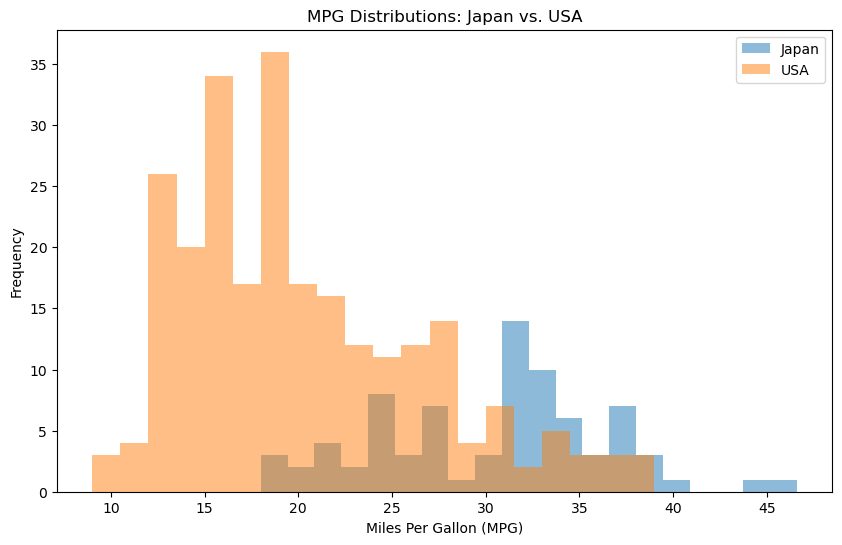

In [39]:
# Filter the data for vehicles from Japan and the USA
japan_mpg = df_cars[df_cars['origin_name'] == 'Japan']['mpg']
usa_mpg = df_cars[df_cars['origin_name'] == 'USA']['mpg']

# Perform the Mann-Whitney U test
u_stat, p_value = scipy.stats.mannwhitneyu(japan_mpg, usa_mpg, alternative='greater')

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis - Vehicles from Japan are significantly more fuel-efficient compared to those from the USA.")
else:
    print("Fail to reject the null hypothesis - Vehicles from Japan are not significantly more fuel-efficient compared to those from the USA.")

# Plotting the distributions
plt.figure(figsize=(10, 6))
plt.hist(japan_mpg, alpha=0.5, label='Japan', bins=20)
plt.hist(usa_mpg, alpha=0.5, label='USA', bins=20)
plt.title('MPG Distributions: Japan vs. USA')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Inference:** Reject the null hypothesis - Vehicles from Japan are significantly more fuel-efficient compared to those from the USA.

### Part 3

**Question:** Is there a significant difference in the weight distribution of vehicles among the USA, Germany, and Japan?

- Null Hypothesis $(H_0)$: There is no significant difference in the weight distribution of vehicles among the USA, Germany, and Japan.
- Alternate Hypothesis $(H_1)$: There is a significant difference in the weight distribution of vehicles among the USA, Germany, and Japan.

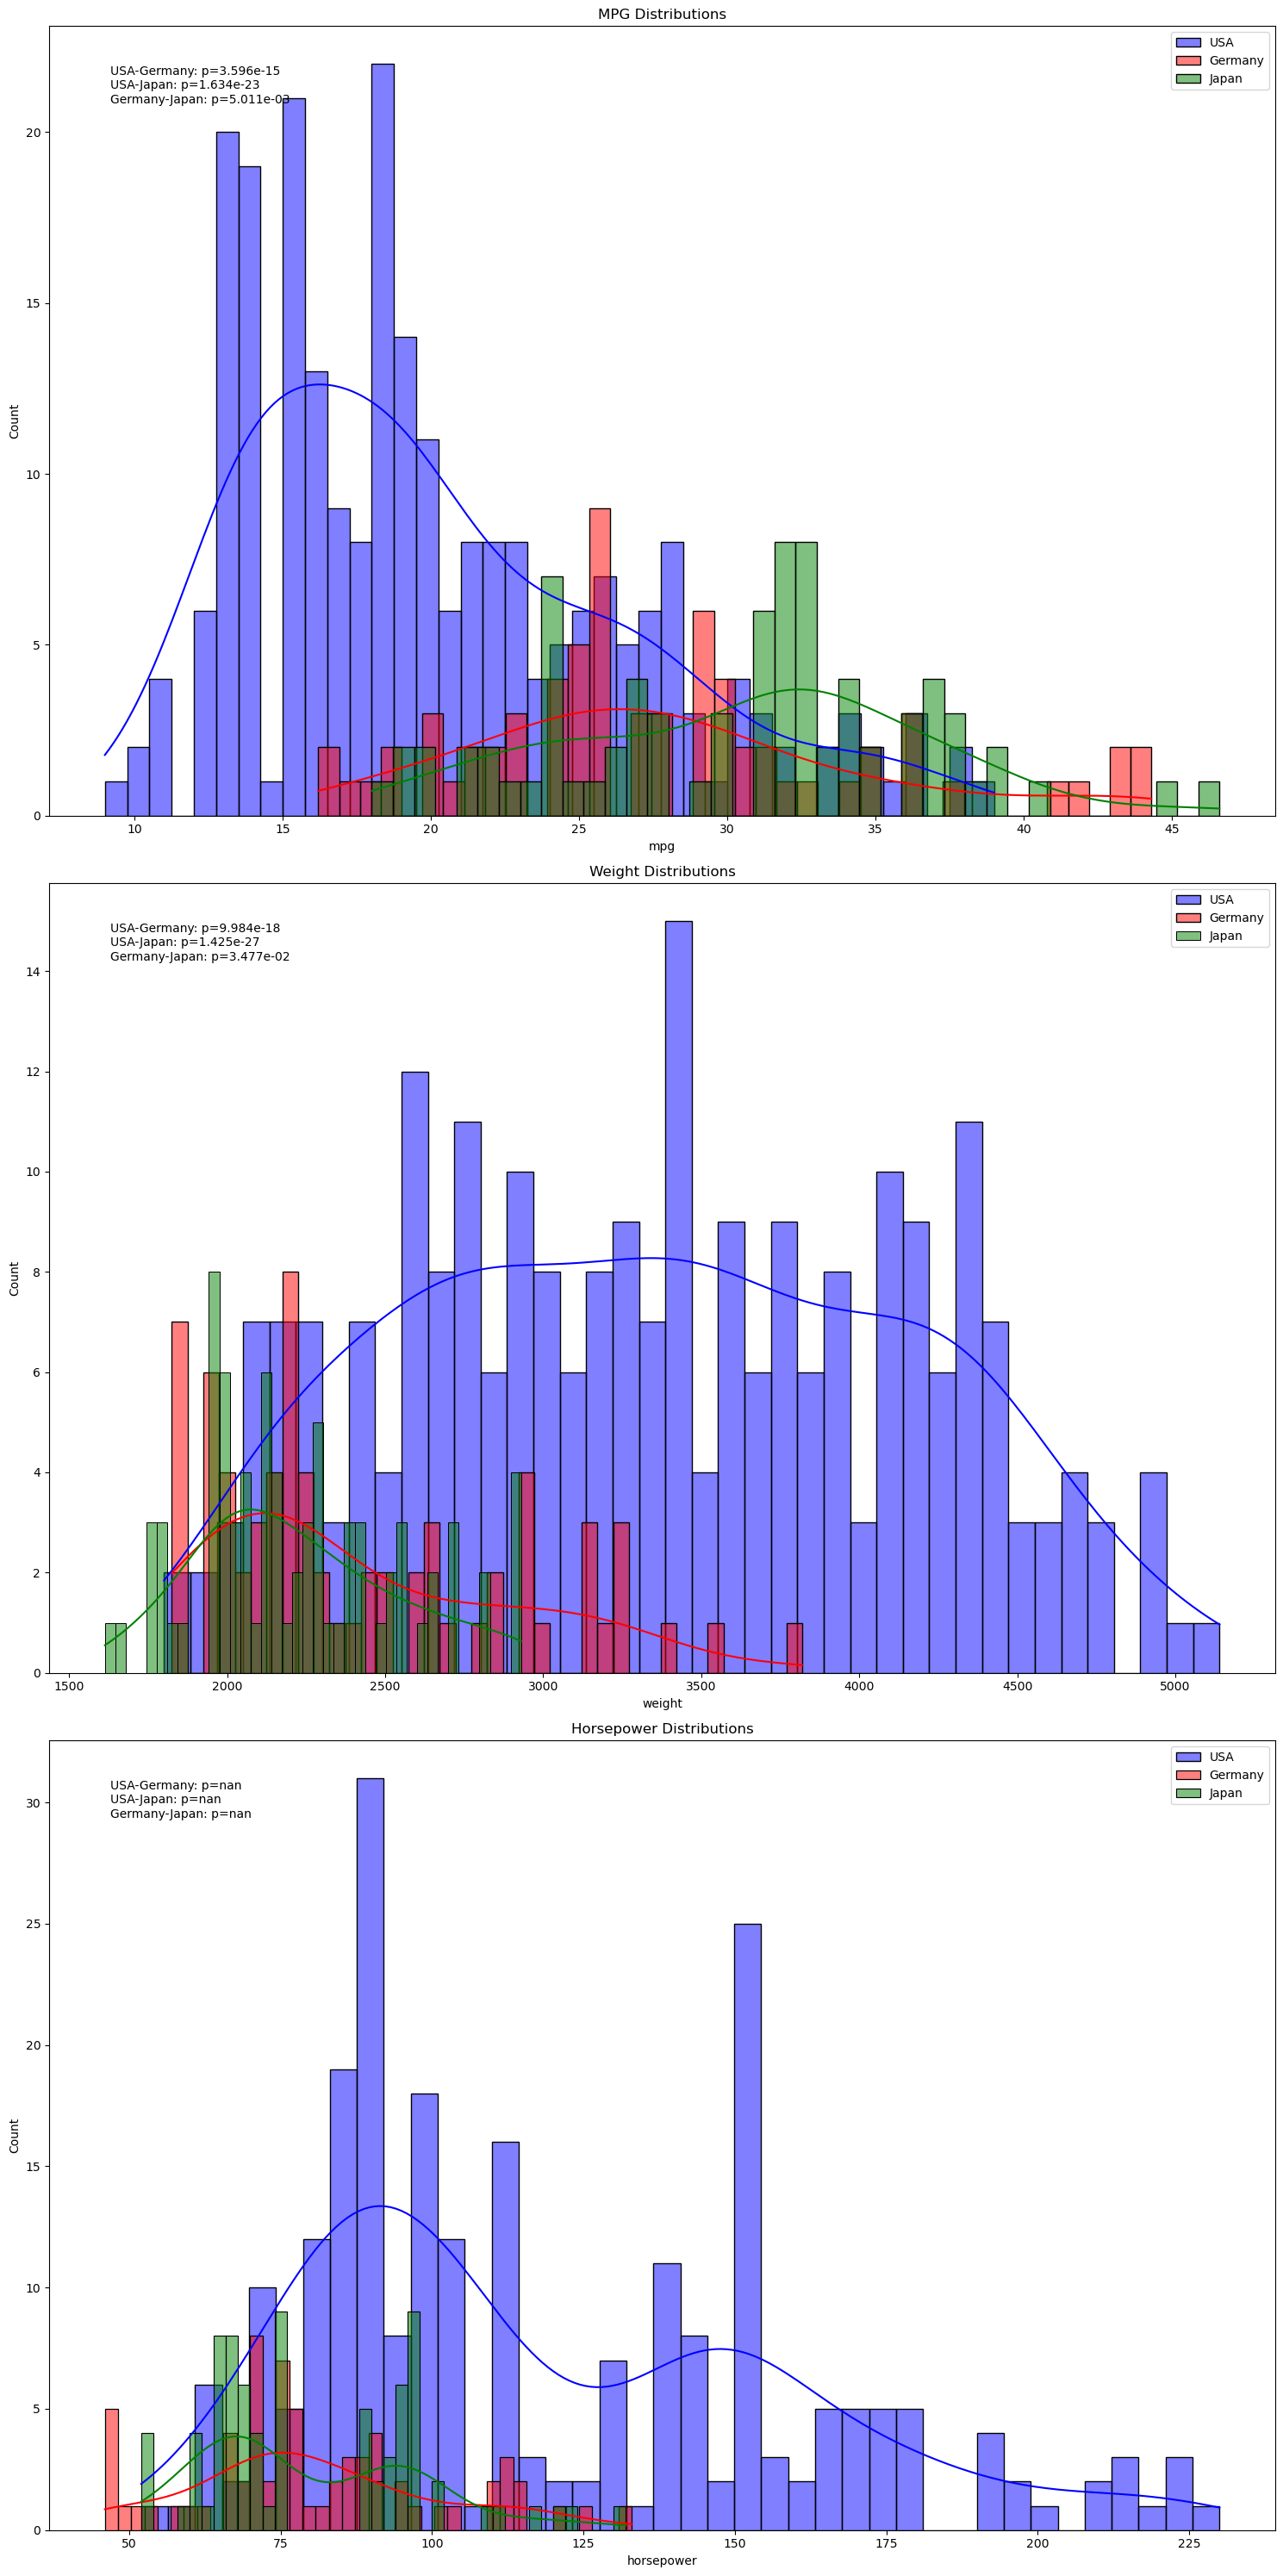

In [42]:
# Function to perform Mann-Whitney U test and return formatted p-value
def perform_test(group1, group2):
    stat, p_value = stats.mannwhitneyu(group1, group2)
    return f'p={p_value:.3e}'

# Create a figure with 3 subplots (rows) and 1 column
fig, axs = plt.subplots(3, 1, figsize=(15, 30))

# Plot 1: MPG distributions
sns.histplot(usa['mpg'], bins=40, kde=True, color='blue', ax=axs[0], label='USA')
sns.histplot(germany['mpg'], bins=40, kde=True, color='red', ax=axs[0], label='Germany')
sns.histplot(japan['mpg'], bins=40, kde=True, color='green', ax=axs[0], label='Japan')
axs[0].set_title('MPG Distributions')
axs[0].legend()
# Perform Mann-Whitney U test for MPG and annotate
mpg_p_usa_germany = perform_test(usa['mpg'], germany['mpg'])
mpg_p_usa_japan = perform_test(usa['mpg'], japan['mpg'])
mpg_p_germany_japan = perform_test(germany['mpg'], japan['mpg'])
axs[0].annotate(f'USA-Germany: {mpg_p_usa_germany}\nUSA-Japan: {mpg_p_usa_japan}\nGermany-Japan: {mpg_p_germany_japan}', xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top')

# Plot 2: Weight distributions
sns.histplot(usa['weight'], bins=40, kde=True, color='blue', ax=axs[1], label='USA')
sns.histplot(germany['weight'], bins=40, kde=True, color='red', ax=axs[1], label='Germany')
sns.histplot(japan['weight'], bins=40, kde=True, color='green', ax=axs[1], label='Japan')
axs[1].set_title('Weight Distributions')
axs[1].legend()
# Perform Mann-Whitney U test for weight and annotate
weight_p_usa_germany = perform_test(usa['weight'], germany['weight'])
weight_p_usa_japan = perform_test(usa['weight'], japan['weight'])
weight_p_germany_japan = perform_test(germany['weight'], japan['weight'])
axs[1].annotate(f'USA-Germany: {weight_p_usa_germany}\nUSA-Japan: {weight_p_usa_japan}\nGermany-Japan: {weight_p_germany_japan}', xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top')

# Plot 3: Horsepower distributions
sns.histplot(usa['horsepower'].sort_values(ascending=True), bins=40, kde=True, color='blue', ax=axs[2], label='USA')
sns.histplot(germany['horsepower'].sort_values(ascending=True), bins=40, kde=True, color='red', ax=axs[2], label='Germany')
sns.histplot(japan['horsepower'].sort_values(ascending=True), bins=40, kde=True, color='green', ax=axs[2], label='Japan')
axs[2].set_title('Horsepower Distributions')
axs[2].legend()
# Perform Mann-Whitney U test for horsepower and annotate
hp_p_usa_germany = perform_test(usa['horsepower'], germany['horsepower'])
hp_p_usa_japan = perform_test(usa['horsepower'], japan['horsepower'])
hp_p_germany_japan = perform_test(germany['horsepower'], japan['horsepower'])
axs[2].annotate(f'USA-Germany: {hp_p_usa_germany}\nUSA-Japan: {hp_p_usa_japan}\nGermany-Japan: {hp_p_germany_japan}', xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top')

plt.tight_layout()
plt.show()


**Inference** 

Reject the `null hypothesis` ($((H_0)$) for each comparison.